# Ultimate Take Home Challenge

## Part 1 - Exploratory Data Analysis 

We'll begin by analyzing a series of login timestamps from January-April of 1970. We'll explore patterns primarily through visual data to get a sense of how and when users use Ultimate's driver service. We'll have to read in the JSON file and resample for 15 minute intervals to start.   

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the logins file
login_df = pd.read_json('logins.json')
login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
# Set login_time as the index
login_df_ind = login_df.set_index(['login_time'])
login_df_ind.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [5]:
# Reseample the timestamps for 15 minute intervals and sort
login_df_res = login_df_ind.sort_index().resample('15min').size()
login_df_res.head()

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15T, dtype: int64

Text(0, 0.5, 'Logins')

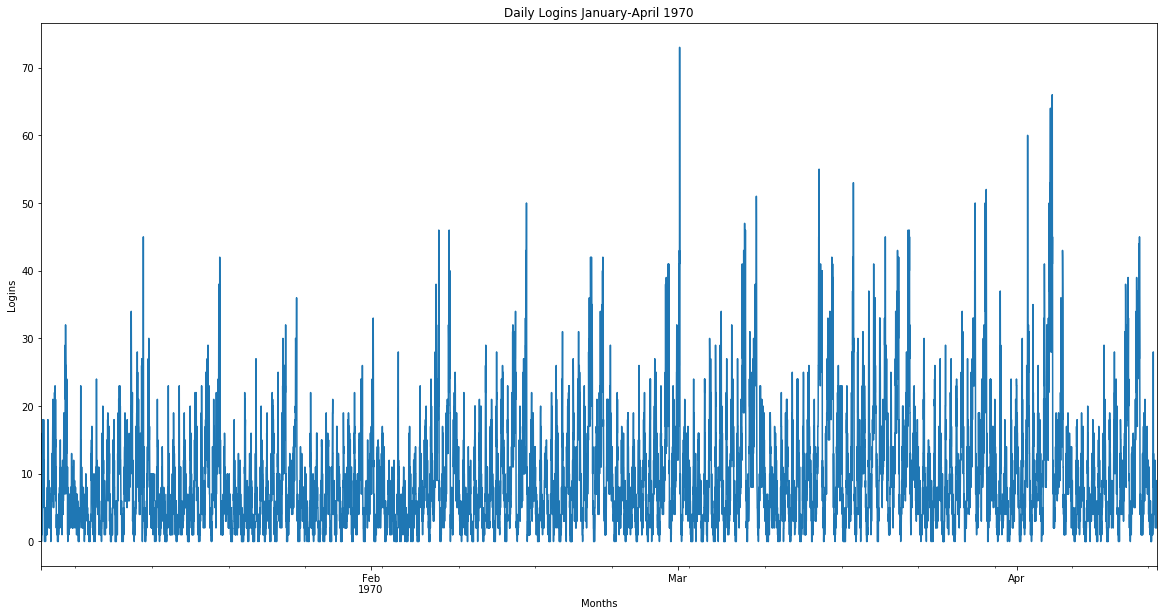

In [6]:
# Plot the entire dataset
login_df_res.plot(figsize=(20,10))
plt.title('Daily Logins January-April 1970')
plt.xlabel('Months')
plt.ylabel("Logins")

An inital graph of the data resampled at 15 minutes suggests that there's a fairly cyclical pattern to the number of logins over time. There appear to be some outliers where the peaks are higher than normal. It also appears that though there is a weekly pattern, it seems to amplify as the months get warmer, perhaps suggesting that logins and driver service usage is more common in warmer months. Let's look at the totals for each month.

In [7]:
# Total logins per month
login_resM = login_df_ind.sort_index().resample('M').size()
login_resM.head()

login_time
1970-01-31    21239
1970-02-28    24673
1970-03-31    33723
1970-04-30    13507
Freq: M, dtype: int64

Text(0, 0.5, 'Logins')

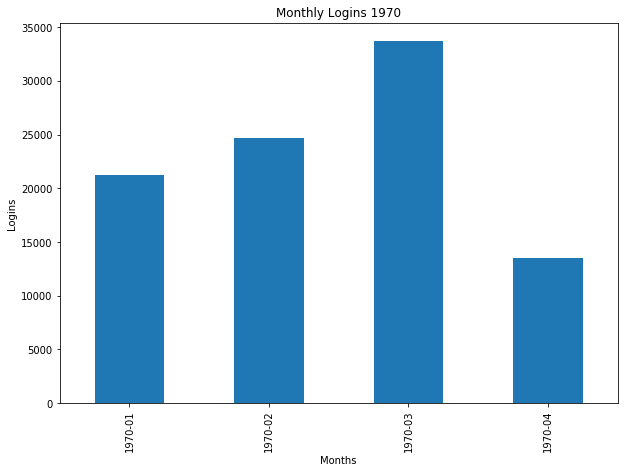

In [8]:
# Plot logins per month
ax = login_resM.plot(kind='bar', figsize=(10, 7))
ax.set_xticklabels(login_resM.index.strftime('%Y-%m'))
plt.title('Monthly Logins 1970')
plt.xlabel('Months')
plt.ylabel("Logins")


Other than April, for which we only have about half a month's data, it does appear that logins are increasing as we head towards warmer months. 

If we look at the number of logins weekly, we see the same general trend.

In [9]:
# Logins per week
login_resW = login_df_ind.sort_index().resample('W').size()
login_resW.head()

login_time
1970-01-04    2374
1970-01-11    5217
1970-01-18    5023
1970-01-25    4751
1970-02-01    4744
Freq: W-SUN, dtype: int64

Text(0, 0.5, 'Logins')

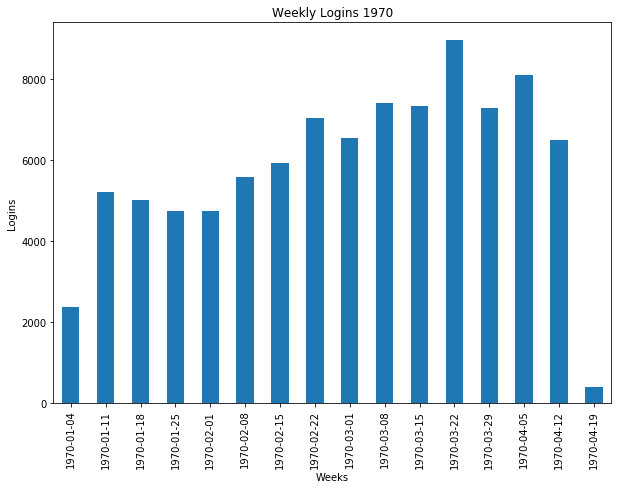

In [10]:
ax = login_resW.plot(kind='bar', figsize=(10, 7))
ax.set_xticklabels(login_resW.index.strftime('%Y-%m-%d'))
plt.title('Weekly Logins 1970')
plt.xlabel('Weeks')
plt.ylabel("Logins")

Finally, if we resample daily, we get a bar graph very similar to the line graph above.

In [11]:
# Add a column of weekday names 
login_resD = login_df_ind.sort_index().resample('D').size()
login_resD.head()

login_time
1970-01-01    112
1970-01-02    681
1970-01-03    793
1970-01-04    788
1970-01-05    459
Freq: D, dtype: int64

Text(0, 0.5, 'Logins')

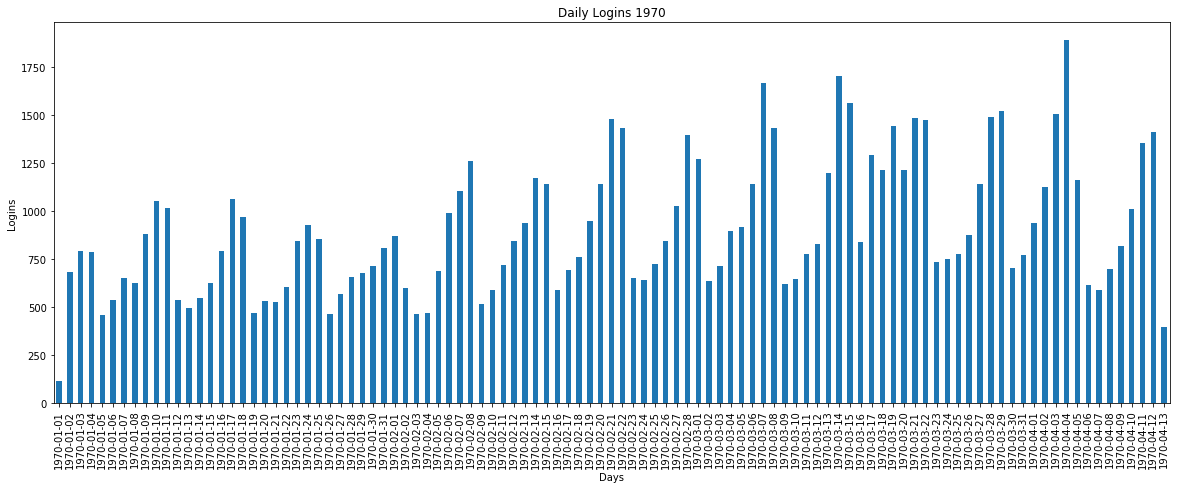

In [12]:
ax = login_resD.plot(kind='bar', figsize=(20, 7))
ax.set_xticklabels(login_resD.index.strftime('%Y-%m-%d'))
plt.title('Daily Logins 1970')
plt.xlabel('Days')
plt.ylabel("Logins")

What we're seeing is a fairly regular weekly pattern as logins increase during the weekends and decrease during weekdays. Since the pattern looks similar from month to month (other than the amplification), it's reasonable to select any one month period to look at the overall monthly pattern. We'll look at March.

In [13]:
# Logins just for the month of March
login_month = login_df_res.loc['1970-03']
login_month

login_time
1970-03-01 00:00:00    16
1970-03-01 00:15:00    19
1970-03-01 00:30:00    17
1970-03-01 00:45:00    12
1970-03-01 01:00:00    20
1970-03-01 01:15:00    21
1970-03-01 01:30:00    31
1970-03-01 01:45:00    26
1970-03-01 02:00:00    17
1970-03-01 02:15:00    20
1970-03-01 02:30:00    22
1970-03-01 02:45:00    26
1970-03-01 03:00:00    32
1970-03-01 03:15:00    41
1970-03-01 03:30:00    34
1970-03-01 03:45:00    26
1970-03-01 04:00:00    43
1970-03-01 04:15:00    41
1970-03-01 04:30:00    73
1970-03-01 04:45:00    48
1970-03-01 05:00:00    22
1970-03-01 05:15:00    14
1970-03-01 05:30:00     8
1970-03-01 05:45:00     7
1970-03-01 06:00:00    10
1970-03-01 06:15:00    10
1970-03-01 06:30:00     9
1970-03-01 06:45:00     4
1970-03-01 07:00:00     3
1970-03-01 07:15:00     3
                       ..
1970-03-31 16:30:00     9
1970-03-31 16:45:00     5
1970-03-31 17:00:00     3
1970-03-31 17:15:00     5
1970-03-31 17:30:00     6
1970-03-31 17:45:00     6
1970-03-31 18:00:00     7
1

Text(0, 0.5, 'Logins')

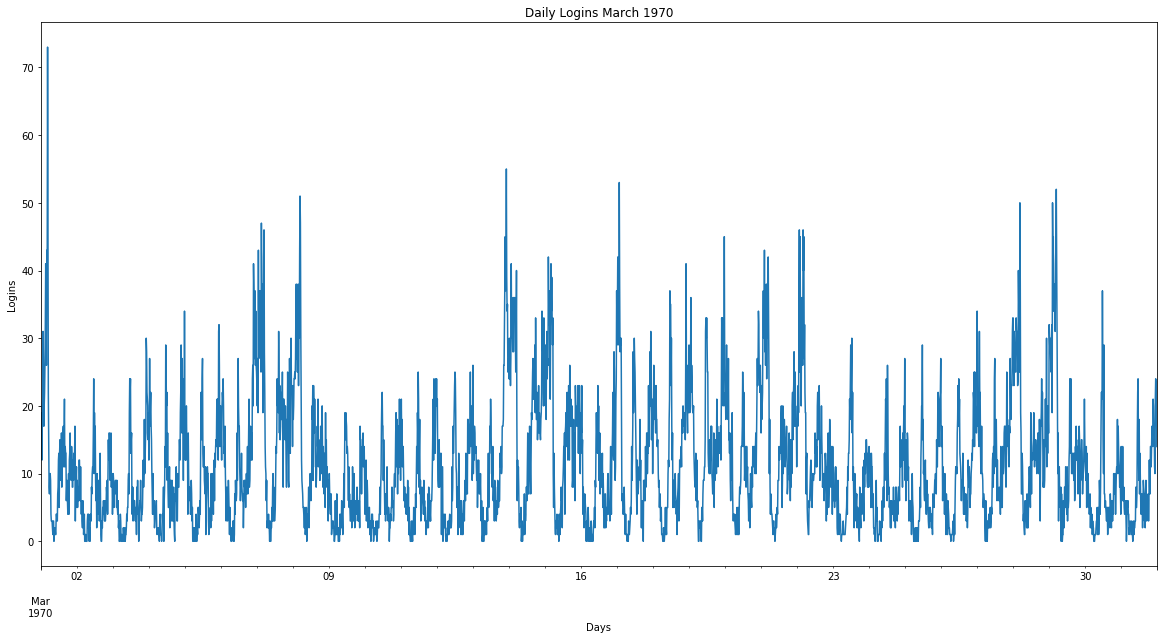

In [14]:
# Graph for March
login_month.plot(figsize=(20,10))
plt.title('Daily Logins March 1970')
plt.xlabel('Days')
plt.ylabel("Logins")

Looking at the pattern for March, we see a cyclical pattern where we have spikes followed by a dip that eventually spikes again. Looking at the 1970 calendar, we can see that the spikes are occuring on the weekends, with the dip occuring during the weekdays. There is a slight outlier for March 17, St.Patrick's, where there's a spike where we'd typically expect a dip according to the pattern. In this case, March 17 behavior resembles that of a weekend.  

So, keeping in mind that most people use the weekend for leisure activities rather than work, perhaps one conclusion we can reach from this is that people login to the driver service more on weekends because they use the service to travel to and from their leisure activities. Whereas, on weekdays, they prefer other modes of transportation. It may also be the case that during the workday, people only use the service to go to work. While on weekends, they may have mutiple destinations. Hence, the increased activity on the weekends.  

Let's continue looking at smaller and smaller time intervals. Having glanced at typical week, let's look at three different days in March - a weekday (Tuesday, March 10th), a weekend day (Saturday, March 28), and St. Patrick's Day. 

In [15]:
# Logins for Tuesday, March 10, 1970
login_wdy = login_month['1970-03-10 00:00:00':'1970-03-10 23:59:59']
login_wdy

login_time
1970-03-10 00:00:00     4
1970-03-10 00:15:00    10
1970-03-10 00:30:00     5
1970-03-10 00:45:00    12
1970-03-10 01:00:00     3
1970-03-10 01:15:00     6
1970-03-10 01:30:00     9
1970-03-10 01:45:00     7
1970-03-10 02:00:00     2
1970-03-10 02:15:00     4
1970-03-10 02:30:00     4
1970-03-10 02:45:00     5
1970-03-10 03:00:00     5
1970-03-10 03:15:00     1
1970-03-10 03:30:00     1
1970-03-10 03:45:00     3
1970-03-10 04:00:00     0
1970-03-10 04:15:00     1
1970-03-10 04:30:00     4
1970-03-10 04:45:00     4
1970-03-10 05:00:00     4
1970-03-10 05:15:00     2
1970-03-10 05:30:00     3
1970-03-10 05:45:00     0
1970-03-10 06:00:00     1
1970-03-10 06:15:00     2
1970-03-10 06:30:00     2
1970-03-10 06:45:00     1
1970-03-10 07:00:00     2
1970-03-10 07:15:00     1
                       ..
1970-03-10 16:30:00     2
1970-03-10 16:45:00     2
1970-03-10 17:00:00     4
1970-03-10 17:15:00     3
1970-03-10 17:30:00     5
1970-03-10 17:45:00     5
1970-03-10 18:00:00     8
1

Text(0, 0.5, 'Logins')

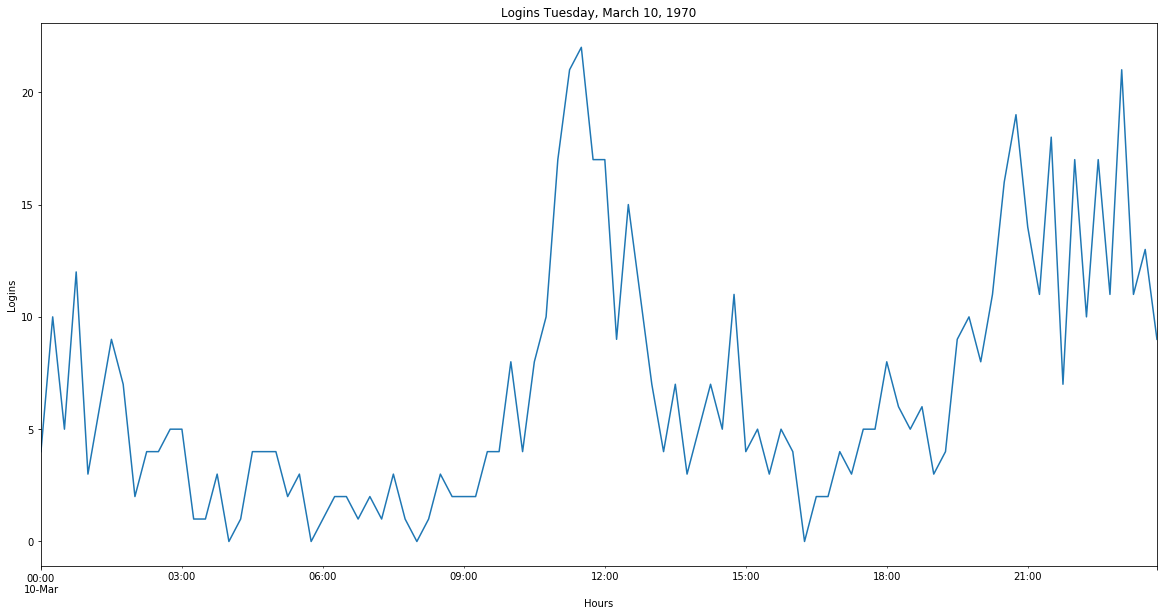

In [16]:
# Plot Tuesday logins
login_wdy.plot(figsize=(20,10))
plt.title('Logins Tuesday, March 10, 1970')
plt.xlabel('Hours')
plt.ylabel("Logins")

In [17]:
# Logins for Saturday, March 28, 1970 
login_wnd = login_month['1970-03-28 00:00:00':'1970-03-28 23:59:59']
login_wnd

login_time
1970-03-28 00:00:00    33
1970-03-28 00:15:00    26
1970-03-28 00:30:00    23
1970-03-28 00:45:00    31
1970-03-28 01:00:00    28
1970-03-28 01:15:00    28
1970-03-28 01:30:00    25
1970-03-28 01:45:00    25
1970-03-28 02:00:00    33
1970-03-28 02:15:00    31
1970-03-28 02:30:00    31
1970-03-28 02:45:00    30
1970-03-28 03:00:00    23
1970-03-28 03:15:00    24
1970-03-28 03:30:00    40
1970-03-28 03:45:00    35
1970-03-28 04:00:00    29
1970-03-28 04:15:00    25
1970-03-28 04:30:00    50
1970-03-28 04:45:00    38
1970-03-28 05:00:00    19
1970-03-28 05:15:00    16
1970-03-28 05:30:00     7
1970-03-28 05:45:00     7
1970-03-28 06:00:00    13
1970-03-28 06:15:00    11
1970-03-28 06:30:00     7
1970-03-28 06:45:00     3
1970-03-28 07:00:00     4
1970-03-28 07:15:00     2
                       ..
1970-03-28 16:30:00    16
1970-03-28 16:45:00    16
1970-03-28 17:00:00    10
1970-03-28 17:15:00    10
1970-03-28 17:30:00    18
1970-03-28 17:45:00    14
1970-03-28 18:00:00     3
1

Text(0, 0.5, 'Logins')

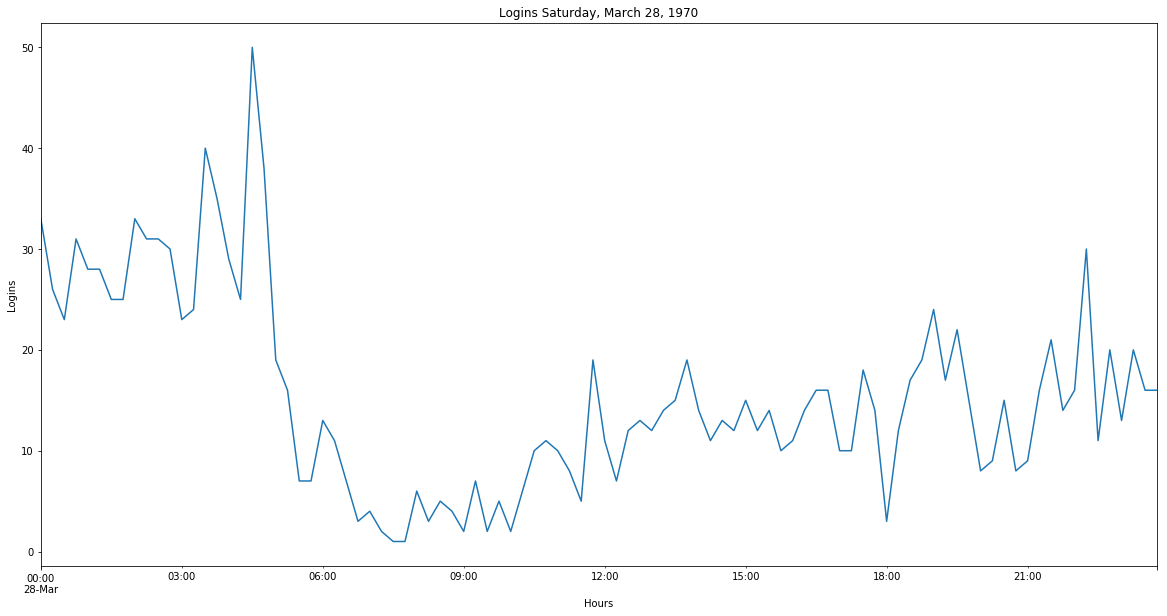

In [18]:
# Plot Saturday logins
login_wnd.plot(figsize=(20,10))
plt.title('Logins Saturday, March 28, 1970')
plt.xlabel('Hours')
plt.ylabel("Logins")

In [19]:
# Logins for St. Patrick's Day
login_spd = login_month['1970-03-17 00:00:00':'1970-03-17 23:59:59']
login_spd

login_time
1970-03-17 00:00:00    29
1970-03-17 00:15:00    34
1970-03-17 00:30:00    42
1970-03-17 00:45:00    35
1970-03-17 01:00:00    36
1970-03-17 01:15:00    29
1970-03-17 01:30:00    53
1970-03-17 01:45:00    38
1970-03-17 02:00:00    28
1970-03-17 02:15:00    30
1970-03-17 02:30:00    29
1970-03-17 02:45:00    30
1970-03-17 03:00:00    18
1970-03-17 03:15:00     6
1970-03-17 03:30:00     7
1970-03-17 03:45:00     6
1970-03-17 04:00:00     4
1970-03-17 04:15:00     4
1970-03-17 04:30:00     5
1970-03-17 04:45:00     8
1970-03-17 05:00:00     5
1970-03-17 05:15:00     2
1970-03-17 05:30:00     1
1970-03-17 05:45:00     4
1970-03-17 06:00:00     1
1970-03-17 06:15:00     1
1970-03-17 06:30:00     1
1970-03-17 06:45:00     0
1970-03-17 07:00:00     1
1970-03-17 07:15:00     1
                       ..
1970-03-17 16:30:00     6
1970-03-17 16:45:00     2
1970-03-17 17:00:00     5
1970-03-17 17:15:00     6
1970-03-17 17:30:00     0
1970-03-17 17:45:00     9
1970-03-17 18:00:00     7
1

Text(0, 0.5, 'Logins')

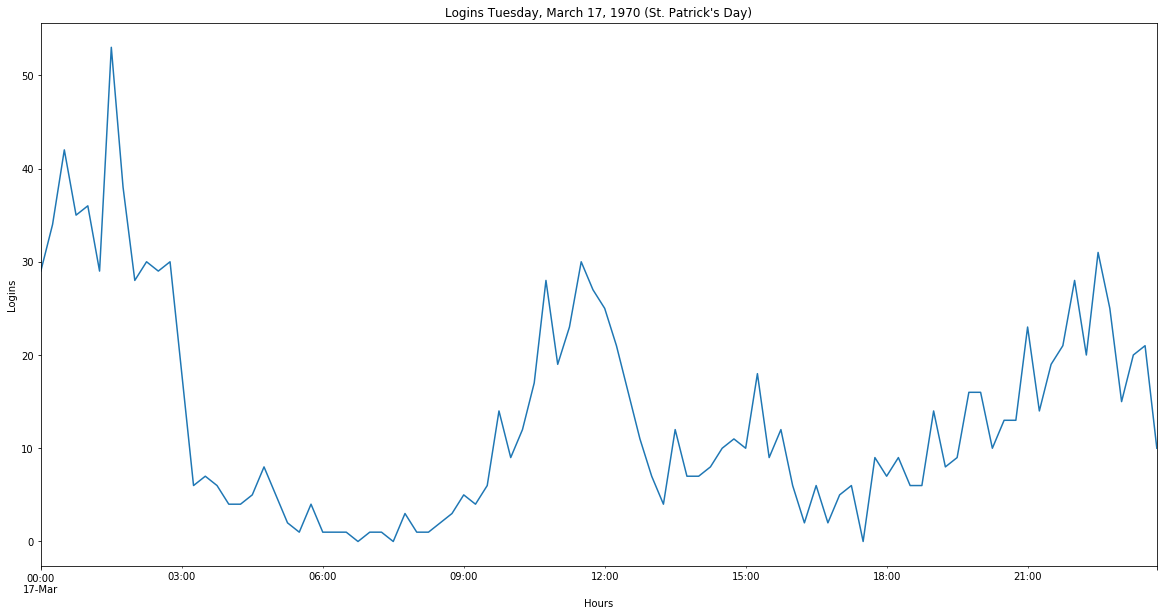

In [20]:
# Plot St. Patrick's Day logins
login_spd.plot(figsize=(20,10))
plt.title("Logins Tuesday, March 17, 1970 (St. Patrick's Day)")
plt.xlabel('Hours')
plt.ylabel("Logins")

Looking at our three days, we see some interesting similarities and differences. On a typical weekday, logins spike around 12:00, or noon. They then dip and spike again after 21:00 at night. On the weekend, they spike just before 6:00 in the morning and stay relatively low for the remainder of the day. On St. Patrick's day, a holiday taking place on a weekday, we see a sharp spike unusually early, before 3:00 in the morning and a couple of smaller spikes around 12:00 and after 21:00. Thus, St. Patrick's Day has characteristics of both a weekday and weekend day. Similar to a weekday, we ssee spikes around 12:00 and after 21:00. But like the weekend, we also see a sharp spike very early in the morning. 

What does this potentially tell us about Ultimate's users? On weekends, it appears that many prefer to login very early to make sure that they are able to book a driver before availability decreases. And the slow, gradual increase late on a weekend may suggest that they are booking for the following day. On weekdays, many users appear to be booking the following day's drivers the night before, hence the increase after 21:00. They don't appear as eager to book the morning of, likely preferring to sleep as long as possible before the start of the workday. However, the spike that we see around 12:00 may be for grabbing lunch during a workday. This difference between weekdays and weekends may also explain the hybrid graph for St Patrick's Day. People plan to celebrate and may book a driver early in the morning for related activities later in the day. However, because people still have to go to work before the festivities later in the day, we still see a lunch related spike around 12:00. Finally, in the evening, as people plan for the next day, we again see an increase after 21:00. 

## Part 2 - Experiment and Metrics Design

We're told that citizens in Gotham and Metropolis have opposite schedules, the former more active during the night and the latter during the day. On weekends, however, they both tend to spread their activity over the course of 24 hours. This doesn’t imply that the drivers of each city are only active during the night or day, so we’ll assume that drivers of each city are available night and day.  Ultimate plans to reimburse all toll costs to encourage drivers to venture beyond their home cities and  across the bridge.

We’re seeing that drivers are not being utilized well because drivers in Gotham are not being used much during the day, while drivers in Metropolis do not get much business during the night. However, because many drivers from both cities refuse to cross the toll bridge to their neighboring city, they miss out on potential clients. This is a loss for Ultimate because a whole host of potential users are not being served. This situation is made worse for Ultimate during the weekends when citizens are more active across 24 hours, yet many drivers still remain exclusive to their own city. 

*1.  What could be a key measure of success of this experiment and why choose this metric?*

A key measure of success could be the average percentage of drivers that serve both cities. With this metric, we would be able to determine, both before and after the reimbursement plan is implemented, the average number of drivers who are present in each city over a certain time period. An increase in this metric would suggest that more clients are being served in each city because more drivers are available during their most active hours.

*2. Design a practical experiment to measure the success of your experiment. <br>
A. How will you implement the experiment? <br>
B. What statistical test(s) will you use to observe significance? <br>
C. How would you interpret the results and give recommendations and caveats?*

One possible experiment would be to track the drivers of each city and monitor the activity of each driver. From their tracking data, we could see how many of the drivers are serving each city. If necessary, we could also track the amount of time these particular drivers are spending in each city. Ideally, we would like to use all of the drivers so that we have a larger dataset and a similar number of drivers for the control and experiment. If Ultimate does not wish to spend a great deal of money on the experiment, we can utilize a small group. But at least 30 randomized drivers per group would be ideal to minimize biasing our results and not require us to worry about a normalized distribution. It may be wise to implement the experiment for at least 3 to 4 months because behaviors can take some time to change. We can first monitor them for 3 to 4 months before the toll reimbursement and 3 to 4 months after. This should give us a nice sample size of both control and experimental data. Another option would be to hold the experiment in just a single 3 to 4 month period with a randomized set of drivers being reimbursed and others not, but that might cause some issues among drivers when they find out that some of their colleagues are being reimbursed while others are not. 

We can use a t-test to determine how significant our results are. We can measure whether the mean difference in the number of drivers traveling between cities is statistically significant. We can also decide what our p-value is; it will likely be 0.05. If it is significant, then we will know that there’s a strong correlation between the toll reimbursement and drivers traveling between cities. And if it isn't significant, then we may need to rethink how we go about increasing driver travel between cities. 

We’ll base our recommendations on how successful the experiment is. There are three possible outcomes. First, if our results are significant, we’ll recommend implementing the toll reimbursement across the entire fleet of drivers, assuming it hasn’t already been done. Second,  if our results are well above our p-value, however, it means that the reimbursement is having little to no effect on driver behavior and that Ultimate would need to look into other issues. It may be worth giving a direct survey to drivers to ask why they are restricting themselves largely to one city and why they aren’t taking advantage of the reimbursement. Another option is to move away from driver behavior and towards user behavior. Perhaps drivers are reacting to how clients use the service, and as a result, finding that their services are not in high demand at certain times of the day or night and/or week.

The last outcome would be that the results are right around our p-value making it not quite clear whether the results are significant.  A result bordering the p-value suggests that some drivers are taking advantage of the reimbursement but that it hasn’t caught on strongly. In this last case, we would likely need to recommend that Ultimate look into the long term implications of the reimbursement. From a financial standpoint, would the profits from a tepid driver response be greater than the losses acquired through toll reimbursement? If so, then it may be wise to move ahead with the implementation. If not, then it may be worth considering some of the other potential factors mentioned above. Though, even in the former case it would be worth looking into other possible factors.


## Part 3 - Predictive Modeling

We're asked to predict rider retention based on users having been active within the last 30 days. All timestamps take place either in January or June/July. We have a number categories that we need to adjust so that we can use them to predict if a user can be considered a retained user. Once we clean the data and do some feature engineering, we'll develop some quick machine learning models to see how well we can predict retained users and what the most important features are for the accuracy that we achieve.

In [22]:
# Load JSON file
ultimate_df = json.load((open('ultimate_data_challenge.json')))

In [23]:
# Normalize JSON file
ultimate_df1 = json_normalize(ultimate_df)
ultimate_df1

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [24]:
ultimate_df1.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [25]:
ultimate_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Let's start by cleaning the dataset - filling in missing values, converting timestamps, and converting bools to ints. 

In the phones column, we're missing around 400 values. The clear majority of the phones are iPhones - roughly 70%. We have a couple of options in filling in the missing values. One could be to randomly fill in iPhone or Android based on the existing ratio. Another would be to fil in 'Other'. The iPhone and Android OS dominate the US market, but it's not unreasonable to occasionally see phones with alternate OS. There's a possibility that the data on these few phones is missing because it's an OS that the Ultimate data services are not familiar with. So, we'll go with the latter substitution. 

In [26]:
ultimate_df1['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [27]:
# Replace all missing values with a random phone based on the ratio of the column
ultimate_df1['phone'] = ultimate_df1['phone'].fillna('Other')

In [28]:
ultimate_df1['phone'].value_counts()

iPhone     34582
Android    15022
Other        396
Name: phone, dtype: int64

For the ratings, there are over 8000 missing of drivers and about 200 missing by drivers. In both cases, 
instead of dropping all of those rows, we'll just fill in the ratings with the respective average of each column. 

In [29]:
# Replace missing values by the respective average rating of each column
ultimate_df1['avg_rating_by_driver'] = ultimate_df1['avg_rating_by_driver'].fillna((ultimate_df1['avg_rating_by_driver'].mean()))
ultimate_df1['avg_rating_of_driver'] = ultimate_df1['avg_rating_of_driver'].fillna((ultimate_df1['avg_rating_of_driver'].mean()))

We also need to convert both of the timestamp columns to datetime. We'll be using them shortly for feature engineering by taking the difference of the two to create a new column that gives the total duration of a user's membership.  

In [30]:
# Convert each timestamp column to datetime
ultimate_df1['last_trip_date'] = pd.to_datetime(ultimate_df1['last_trip_date'])
ultimate_df1['signup_date'] = pd.to_datetime(ultimate_df1['signup_date'])

We would also like to convert the True/False values in the ultimate_black_user column to 1's and 0's to make it easier to use 
in a predictive model. 

In [31]:
# Convert bool to int
ultimate_df1.ultimate_black_user = ultimate_df1.ultimate_black_user.astype(int)

In [32]:
ultimate_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null int32
weekday_pct               50000 non-null float64
dtypes: datetime64[ns](2), float64(6), int32(1), int64(1), object(2)
memory usage: 4.4+ MB


Let's also quickly see how many users we have from each city.

In [33]:
ultimate_df1['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

We'll do a bit of feature engineering and introduce a couple of new variables. The first is tot_dist, which is the total distance a user traveled in the first thirty days and is calculated by multiplying avg_dist and trips_in_first_30_days. 

In [34]:
ultimate_df1['tot_dist'] = round(ultimate_df1['avg_dist'] * ultimate_df1['trips_in_first_30_days'], 2)

We'll aslo create a variable labeled weekend_pct, which is just the opposite of weekday_pct and takes the absolute difference between 100 and weekday_pct.

In [35]:
ultimate_df1['weekend_pct'] = (ultimate_df1['weekday_pct'] - 100).abs()

Let's look at the earliest and latest dates for the signup and last trip dates. The last trip date is July 1st and the earliest signup date is January 1st. Anyone who can be considered a retained user has to have taken a trip within the last 30 days, menaing that they ahve to have taken a trip in June. So, we'll create a binary column that lists whether a user has taken a trip in June and those will be our retained users.

In [36]:
print('The earliest signup date is ' + str(ultimate_df1['signup_date'].min()))
print('The latest signup date is ' + str(ultimate_df1['signup_date'].max()))
print('The earliest last trip date is ' + str(ultimate_df1['last_trip_date'].min()))
print('The latest last trip date is ' + str(ultimate_df1['last_trip_date'].max()))

The earliest signup date is 2014-01-01 00:00:00
The latest signup date is 2014-01-31 00:00:00
The earliest last trip date is 2014-01-01 00:00:00
The latest last trip date is 2014-07-01 00:00:00


In [37]:
# Determine whether a user has had the service at least 5 months and, hence, retained users
ultimate_df1['retained_user'] = np.where(ultimate_df1['last_trip_date'].dt.month == 6, 1, 0)
ultimate_df1.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,tot_dist,weekend_pct,retained_user
0,3.67,5.0,4.700000,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,14.68,53.8,1
1,8.26,5.0,5.000000,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,0.00,50.0,0
2,0.77,5.0,4.300000,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,2.31,0.0,0
3,2.36,4.9,4.600000,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,21.24,20.0,1
4,3.13,4.9,4.400000,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,43.82,17.6,0
5,10.56,5.0,3.500000,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,1,100.0,21.12,0.0,1
6,3.95,4.0,4.601559,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,0,100.0,3.95,0.0,0
7,2.04,5.0,5.000000,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,0,100.0,4.08,0.0,0
8,4.36,5.0,4.500000,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,0,100.0,8.72,0.0,0
9,2.37,5.0,4.601559,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,0,0.0,2.37,100.0,0


In [38]:
ultimate_df1.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,tot_dist,weekend_pct,retained_user
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,0.37708,60.926084,10.255395,39.073916,0.365120
std,5.707357,0.445753,0.564977,0.222336,19.958811,3.792684,0.48466,37.081503,17.161055,37.081503,0.481469
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,0.00000,33.300000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,0.00000,66.700000,4.770000,33.300000,0.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,1.00000,100.000000,13.440000,66.700000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,1.00000,100.000000,578.500000,100.000000,1.000000


We'll now delete our timestamp columns since they're of no use to our ML models.

In [39]:
# Drop the timestamp columns
ultimate_df1 = ultimate_df1.drop(['signup_date', 'last_trip_date'], axis=1)

Let's also use get_dummies for our two categorical columns

In [40]:
# Turn categorical values into numerical values
ultimate_df1_gd = pd.get_dummies(ultimate_df1)
ultimate_df1_gd.head(5)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,tot_dist,weekend_pct,retained_user,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Other,phone_iPhone
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,14.68,53.8,1,0,1,0,0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,0.00,50.0,0,1,0,0,1,0,0
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,2.31,0.0,0,1,0,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,21.24,20.0,1,0,1,0,0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,43.82,17.6,0,0,0,1,1,0,0


Finally, before we move onto our ML models, we need to quickly determine what fraction of the overall 
users are retained users. 

In [41]:
# Fraction of retained users
print('The fraction of retained users is ' + str(ultimate_df1_gd.retained_user.value_counts()[1]/len(ultimate_df1_gd)))

The fraction of retained users is 0.36512


Now, let's run several ML models. We'll pick one from among the most accurate and do some hyperparameter tuning to increase 
our accuracy and then find the most important features of that particular model.

In [42]:
# Import various sklearn libraries and models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [43]:
# Create our dependent and independent variables 
X = ultimate_df1_gd.drop('retained_user', axis=1)
y = ultimate_df1_gd['retained_user']
X.shape, y.shape

((50000, 16), (50000,))

In [44]:
# Create a function that fits data to a given ML model
def ml_model(X, y, model, test_size=0.2, random_state=9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    model.fit(X_train, y_train)
    print("training accuracy: %.3f" % model.score(X_train, y_train))
    print("test accuracy: %.3f" % model.score(X_test, y_test))

In [45]:
# Logistic regression model
lr = LogisticRegression()
ml_model(X, y, lr)

C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


training accuracy: 0.717
test accuracy: 0.710


In [46]:
# Random forest model
rf = RandomForestClassifier()
ml_model(X, y, rf)

C:\Users\K\Anaconda373\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


training accuracy: 0.977
test accuracy: 0.741


In [47]:
# KNN model
knn = KNeighborsClassifier()
ml_model(X, y, knn)

training accuracy: 0.811
test accuracy: 0.729


In [48]:
# Linear discriminant model
lda = LinearDiscriminantAnalysis()
ml_model(X, y, lda)

training accuracy: 0.717
test accuracy: 0.710


C:\Users\K\Anaconda373\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


The random forest model did better than the others. We'll tune some of its hyperparameters using GridSearchCV and then determine the most important features.

In [49]:
# Select ranges for the random forest hyperparameters and then run GridSearchCV to determine the optimal values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
paramrf = {'n_estimators':[10, 15,  20], 'max_depth':[3,  5, 7], 'min_samples_split':[2, 4, 6]}

rf_cv = GridSearchCV(estimator=rf, param_grid=paramrf, cv=5).fit(X_train, y_train)
print(rf_cv.best_params_)

{'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 20}


In [50]:
# Rerun random forest with new hyperparameters
rf_best = RandomForestClassifier(max_depth=7, min_samples_split=4, n_estimators=20) 
ml_model(X, y, rf_best)

training accuracy: 0.780
test accuracy: 0.771


In [51]:
# Create a new dataframe that lists all features and their importances 
feature_importance = pd.DataFrame(rf_best.feature_importances_, index=X_train.columns, columns=['feature_importance']).sort_values('feature_importance', ascending=False)
feature_importance

,feature_importance
avg_rating_by_driver,0.188186
city_King's Landing,0.137484
surge_pct,0.126783
weekend_pct,0.102061
avg_surge,0.088367
weekday_pct,0.079992
ultimate_black_user,0.060975
phone_iPhone,0.053678
phone_Android,0.049237
city_Astapor,0.030006


Using cross validation, we were able to reduce overfitting significantly and increase our accuracy by 3%. 77% accuracy isn't great, but it does tell us something about the features that matter most in understanding user retention. In this case, the average rating given by the driver is the strongest indicator as to whther a user is retained. From there, a user being from King's Landing and surge percentage, the percentage of trips during which  a user used the surge multiplier, round out the top three.  

Regarding whether our model is valid, it is  because we've gone through the necessary steps to ensure that it is. We ran the model with training data, and tuned the hyperparameters using cross validation and then tested the accuracy on data that the model had not previously seen. Plus, it isn't overfitting by much, with the training accuracy only slightly higher than the test accuracy. 

However, there are some possible concerns both with the data and with our process. In terms of the dataset, more data is always more helpful, especially given that we were only able to achieve 77% accuracy. It's likely that there are several other factors that are important that aren's being accouted for in this dataset. Knowing the total/average number of trips, typical time of day that a rider uses the service, among other variables could have increased our accuracy. But it's particularly telling that the rating given by the driver is the most important feature, while the rating given by the user seems to matter very little (especially since the averages of both categories are very similar). It suggests that we need more information on users. Data such as age, sex/gender, and race may all be useful. Perhaps there is some correlation between ratings and these particular features; perhaps drivers may have biases against certain types of passengers.  

With regard to the process, we didn't test to determine whether the data exhibited multicolliniearity. For example surge usage and weekday usage may be strongly correlated and taking that into account may increase our accuracy further. Additionally, we didn't conduct a great deal of inferential analysis. We could have, for instance, tested to see if there was a statistically significant difference in ratings by drivers between users who are and aren't retained users.   

In some sense, it's difficult to fully recommend how Ultimate can go about retaining more users because we likely need much more data to make a better assessment of how to predict retained users. However, based on the results that we did achive, we can say that Ultimate needs to learn more about its users as well as how its drivers go about rating users. It's clear that ratings by drivers matter in retaining users. So the more they can learn about that process, the better they'll understand why certain users stick with the service while others do not. Looking at the other two top three features, users who use the surge multiplier seem to stay with the service long term. So, making surge more enticing to encourage more widespread adoption may also be helpful increasing Ultimate's user base. Finally, King's Landing appears to be much more important in predicting retained users than the other two cities while having by far the least number of users. It's worth Ultimate stepping up it's advertising in the other two cities while also doing further research into the differences in demographics of these three cities.  
  